In [63]:
# Basic classification: Classify images of clothing
# https://www.tensorflow.org/tutorials/keras/classification

In [64]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.3.0


In [65]:
# Import the Fashion MNIST dataset
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [66]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [67]:
print(class_names)

['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [68]:
# Explore the data
train_images.shape

(60000, 28, 28)

In [69]:
len(train_labels)

60000

In [70]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [71]:
test_images.shape

(10000, 28, 28)

In [72]:
len(test_labels)

10000

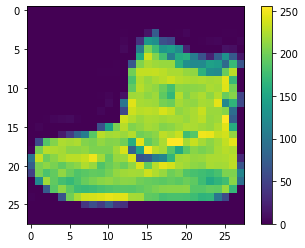

In [73]:
# Preprocess the data
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [74]:
train_images = train_images / 255.0

test_images = test_images / 255.0

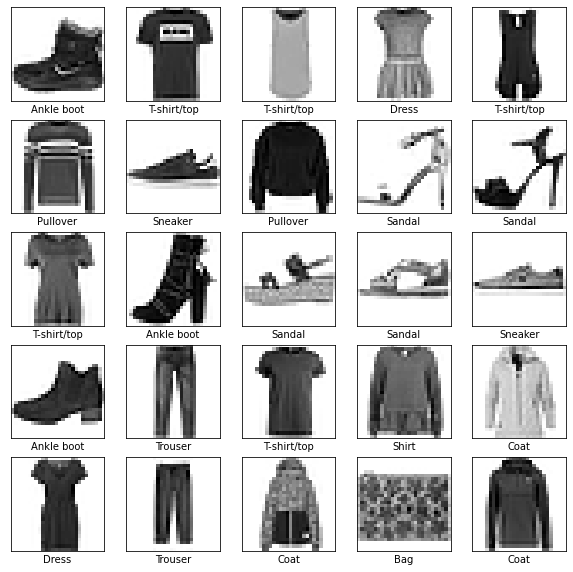

In [75]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [76]:
# Build the model

In [77]:
# Set up the layers
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

In [78]:
# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [79]:
# Train the model

In [80]:
# Feed the model
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5003 - accuracy: 0.8230
Epoch 2/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.3764 - accuracy: 0.8640
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3377 - accuracy: 0.8774
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3131 - accuracy: 0.8846
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2961 - accuracy: 0.8910
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2829 - accuracy: 0.8960
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2710 - accuracy: 0.8997
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2565 - accuracy: 0.9044
Epoch 9/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2490 - accuracy: 0.9079
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.23

In [81]:
# Evaluate Accuracy
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3430 - accuracy: 0.8817

Test accuracy: 0.8816999793052673


In [82]:
# Make predictions
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

predictions = probability_model.predict(test_images)

predictions[0]

array([5.7316985e-08, 1.7919945e-10, 4.1408296e-07, 7.3595583e-09,
       1.1727075e-08, 2.8525526e-04, 5.8355450e-08, 8.7079369e-03,
       2.3058224e-07, 9.9100596e-01], dtype=float32)

In [83]:
np.argmax(predictions[0])

9

In [84]:
test_labels[0]

9

In [85]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

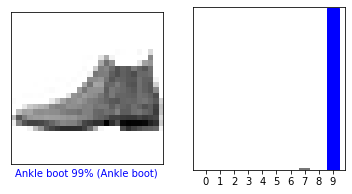

In [86]:
# Verify predictions
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

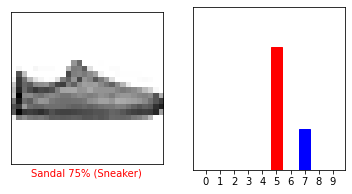

In [87]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

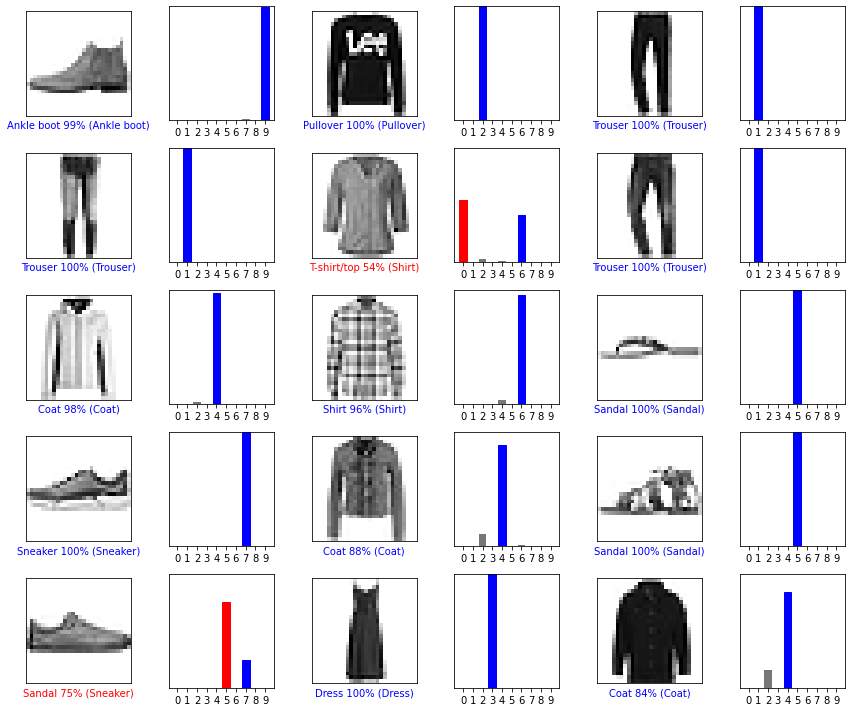

In [88]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [89]:
# Use the trained model

In [90]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


In [91]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [92]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[6.6224718e-05 1.0389045e-15 9.9969566e-01 7.5794236e-15 2.3229966e-04
  6.1240455e-14 5.8432997e-06 2.3537677e-18 4.1056926e-13 2.4412872e-15]]


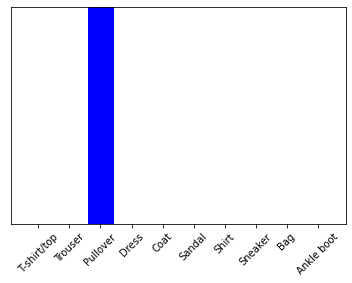

In [93]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [94]:
np.argmax(predictions_single[0])

2